<a href="https://colab.research.google.com/github/YeongJUnJoH171/ml_study/blob/main/Wine_classification_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

wine.head()
# 화이트와인이 양성 클래스 = 전체 데이터에서 화이트 와인을 골라내는 문제 

wine.info()
# info 메서드는 데이터셋의 정보를 가져옴 

wine.describe()
# 데이터셋의 평균 표준편차 최소 최대 등을 보여줌 

#  standardScalar 클래스를 이용해 특성을 표준화 
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42) 
# 샘플 개수가 충분하므로 세트의 20퍼 정도만 테스트 세트로 나눔 

print(train_input.shape , test_input.shape)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input) 
# 훈련 세트를 전처리함 -> train_scaled 와 test_scaled는 표준점수로 변환된 훈련과 테스트셋 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))

print(lr.score(test_scaled, test_target))

# 회귀분석을 실시하였고, 계수를 한번 알아보면, 

print(lr.coef_,lr.intercept_)


# 여기부터는 결정 트리를 이용한 모델 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state= 42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree 
# pt.figure(figsize=(10,7))
# plot_tree(dt)
# plt.show()

# plt.figure(figsize=(10,7))
# plot_tree(dt, max_depth=1, filled= True, feature_names= ['alcohol','sugar','pH'])
# plt.show()

# 가지치기 -> 트리를 그냥 냅두면 끝없이 자라남 -> 훈련세트에는 좋지만 테스트 세트에는 일반화가 부족해짐 

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled , train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
(5197, 3) (1300, 3)
0.7808350971714451
0.7776923076923077
[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]
0.996921300750433
0.8592307692307692
0.8454877814123533
0.8415384615384616


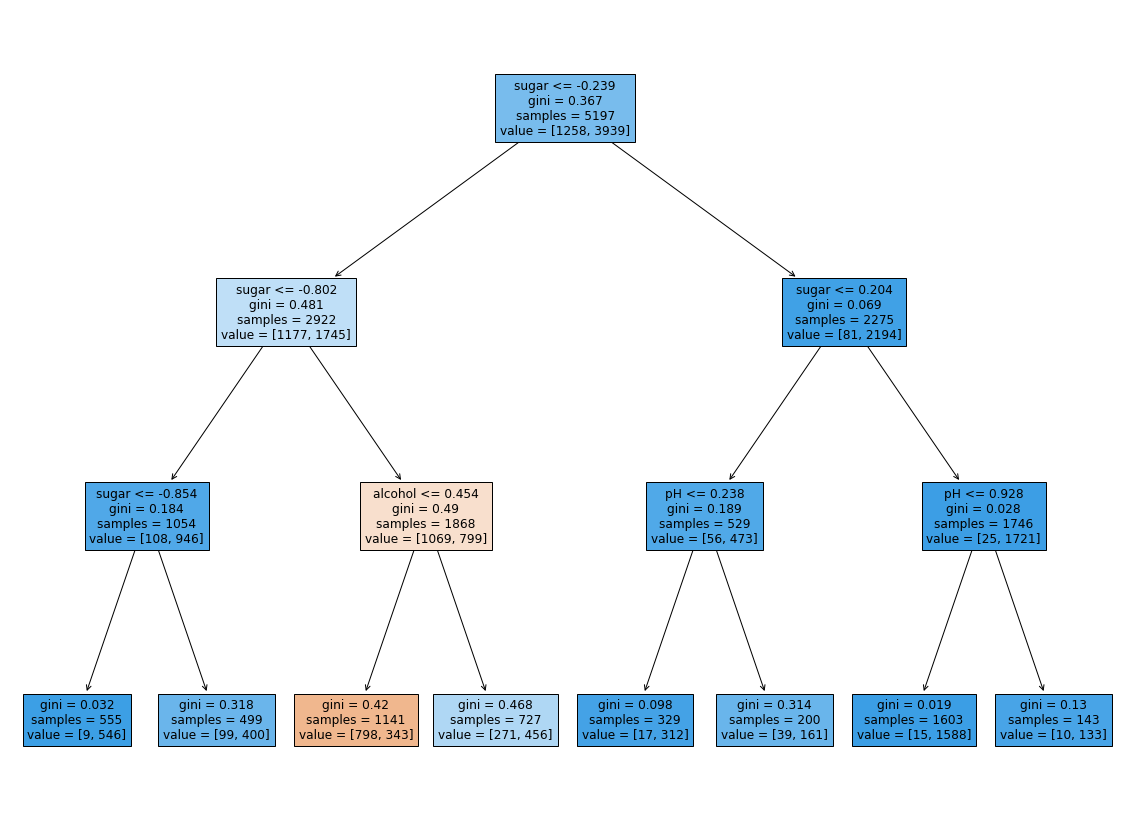

In [31]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True, feature_names=['alcohol','sugar', 'pH'])
plt.show()

# +이 결정 트리를 사용할 땐 전처리 과정이 필요 없음. 